In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

In [2]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize to 0–1
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# Flatten images (28x28 -> 784)
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test  = X_test.reshape((X_test.shape[0], 28*28))

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [3]:
def build_model(activation="relu", optimizer="adam", hidden_layers=1):
    model = models.Sequential()
    model.add(layers.Input(shape=(784,)))
    
    # hidden layers
    for _ in range(hidden_layers):
        model.add(layers.Dense(128, activation=activation))
    
    # output layer (softmax for 10 classes)
    model.add(layers.Dense(10, activation="softmax"))
    
    model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",   
        metrics=["accuracy"]
    )
    return model

In [4]:
# ReLU
relu_model = build_model(activation="relu", optimizer="adam", hidden_layers=1)
hist_relu = relu_model.fit(X_train, y_train, 
                           validation_split=0.2,
                           epochs=10, batch_size=128, verbose=1)

# Sigmoid
sig_model = build_model(activation="sigmoid", optimizer="adam", hidden_layers=1)
hist_sig = sig_model.fit(X_train, y_train, 
                         validation_split=0.2,
                         epochs=10, batch_size=128, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8941 - loss: 0.3910 - val_accuracy: 0.9449 - val_loss: 0.2087
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9479 - loss: 0.1849 - val_accuracy: 0.9567 - val_loss: 0.1552
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9618 - loss: 0.1337 - val_accuracy: 0.9617 - val_loss: 0.1296
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9713 - loss: 0.1034 - val_accuracy: 0.9673 - val_loss: 0.1151
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9766 - loss: 0.0832 - val_accuracy: 0.9697 - val_loss: 0.1025
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9807 - loss: 0.0692 - val_accuracy: 0.9688 - val_loss: 0.0994
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9835 - loss: 0.0579 - val_accuracy: 0.9708 - val_loss: 0.0969
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9862 - loss: 0.0496 - val_ac

In [5]:
opt_results = {}
for opt in ["adam", "sgd", "rmsprop"]:
    print(f"\nTraining with {opt.upper()}")
    model = build_model(activation="relu", optimizer=opt, hidden_layers=1)
    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)
    loss, acc = model.evaluate(X_test, y_test, verbose=1)
    opt_results[opt] = acc


Training with ADAM
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8906 - loss: 0.3949 - val_accuracy: 0.9414 - val_loss: 0.2129
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9471 - loss: 0.1846 - val_accuracy: 0.9546 - val_loss: 0.1619
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9613 - loss: 0.1341 - val_accuracy: 0.9617 - val_loss: 0.1352
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9700 - loss: 0.1061 - val_accuracy: 0.9638 - val_loss: 0.1199
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9753 - loss: 0.0859 - val_accuracy: 0.9698 - val_loss: 0.1053
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9796 - loss: 0.0719 - val_accuracy: 0.9713 - val_loss: 0.0971
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9832 - loss: 0.0603 - val_accuracy: 0.9704 - val_loss: 0.0969
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9864 - 

In [6]:
# 1 hidden layer
model_1 = build_model(activation="relu", optimizer="adam", hidden_layers=1)
model_1.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1)
loss1, acc1 = model_1.evaluate(X_test, y_test, verbose=1)

# 2 hidden layers
model_2 = build_model(activation="relu", optimizer="adam", hidden_layers=2)
model_2.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1)
loss2, acc2 = model_2.evaluate(X_test, y_test, verbose=1)

print(f"1 Hidden Layer Accuracy: {acc1:.4f}")
print(f"2 Hidden Layers Accuracy: {acc2:.4f}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9011 - loss: 0.3565
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9538 - loss: 0.1639
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9664 - loss: 0.1183
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9734 - loss: 0.0918
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9786 - loss: 0.0746
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9822 - loss: 0.0630
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9848 - loss: 0.0515
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9876 - loss: 0.0429
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9894 - loss: 0.0366
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9919 - loss: 0.0301
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9775 - loss: 0.0763
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/

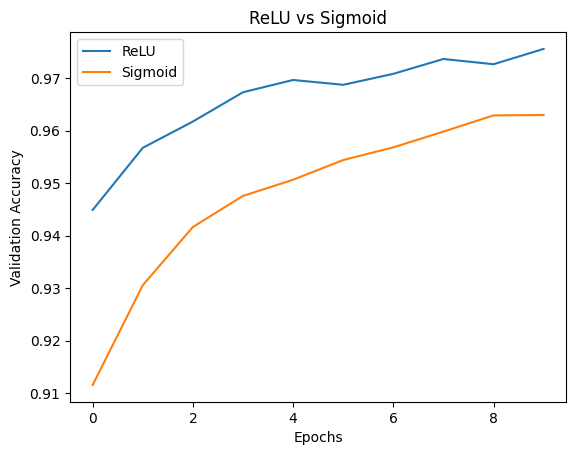

In [7]:
plt.plot(hist_relu.history["val_accuracy"], label="ReLU")
plt.plot(hist_sig.history["val_accuracy"], label="Sigmoid")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("ReLU vs Sigmoid")
plt.legend()
plt.show()

### **Key Insights for MNIST Classification**

**Hidden layers (Sigmoid vs ReLU):**

Sigmoid causes vanishing gradients → slower training, lower accuracy.

ReLU avoids this → faster convergence, better results.

**Output activation (Softmax vs others):**

Softmax turns outputs into probabilities suited for classification.

Alternatives (sigmoid, relu, linear) are less effective for multi-class tasks.

**Depth (more hidden layers):**

Increases model capacity, but also training time and risk of overfitting.

MNIST already achieves high accuracy with shallow networks.

**Optimizers:**

Adam → fastest convergence, strong performance.

RMSprop → adaptive, good but less stable.

SGD → slower, needs tuning, but can generalize well